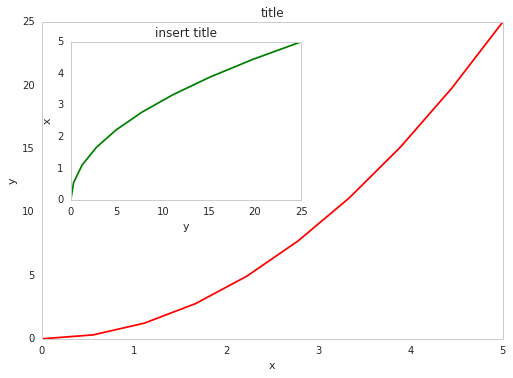

In [9]:
from pdata import *
x = np.linspace(0, 5, 10)
y = x ** 2
with sns.axes_style("whitegrid",{'axes.grid': False}):    
    fig = figure()

    axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
    axes2 = fig.add_axes([0.15, 0.45, 0.4, 0.4]) # inset axes

    # main figure
    axes1.plot(x, y, 'r')
    axes1.set_xlabel('x')
    axes1.set_ylabel('y')
    axes1.set_title('title')

    # insert
    axes2.plot(y, x, 'g')
    axes2.set_xlabel('y')
    axes2.set_ylabel('x')
    axes2.set_title('insert title');

In [12]:
from IPython.display import IFrame, HTML
from IPython.core.display import display

display(IFrame("https://code.earthengine.google.com", '800px', '600px'))